In [1]:
import loss as wobble_loss
import simulator as wobble_sim
import model as wobble_model
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at


In [2]:
tbl = at.QTable.read('data/hat-p-20.fits')

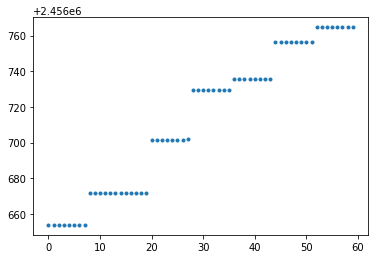

In [3]:
i = 5
plt.plot(range(tbl['BJD'].shape[0]),tbl['BJD'],'.')
plt.show()

In [4]:
print(tbl['wavelength'].shape)

(60, 6144)


In [5]:
import astropy.units as u


x = jnp.array(np.log(tbl['wavelength']/u.nm))

In [6]:
y = jnp.array(np.log(tbl['flux']))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [7]:
loss_1 = wobble_model.LossFunc('L2Loss')
loss_2 = 1 * wobble_model.LossFunc('L2Reg')
loss   = loss_1 + loss_2

In [8]:
print(tbl.columns)

<TableColumns names=('wavelength','flux','flux_err','mask','BJD')>


In [9]:
vel_shifts = jnp.zeros(tbl['wavelength'].shape[0])

In [10]:
print(vel_shifts.shape)

(60,)


In [11]:
num_params = 80
str_model  = wobble_model.LinModel(num_params,y,x,vel_shifts)

In [12]:
noise = tbl['flux_err']
print(noise.shape)

(60, 6144)


         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


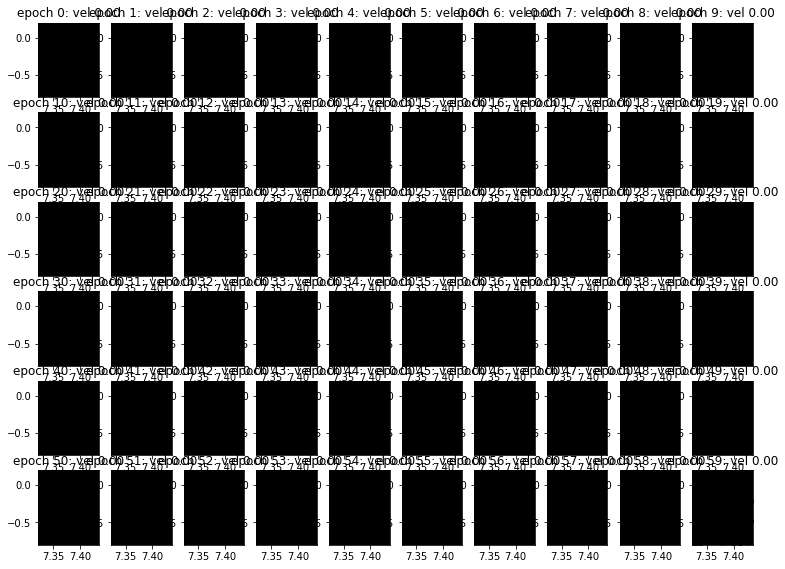

In [13]:
str_model.optimize(loss)
str_model.plot(noise)
plt.show()

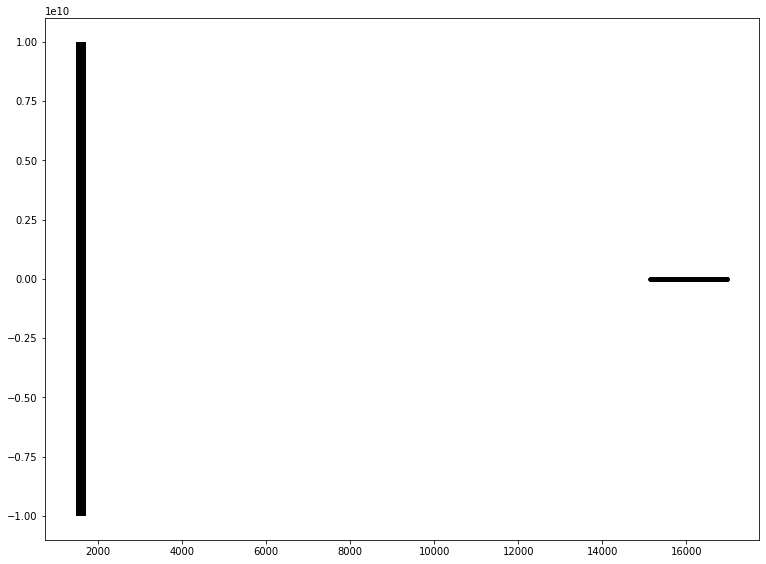

In [14]:
plt.figure(figsize=[12.8,9.6])
plt.errorbar(tbl['wavelength'][0,1:]/u.nm,tbl['flux'][0,1:],yerr=tbl['flux_err'][0,1:],fmt='.k',zorder=1,alpha=0.9,ms=6)
plt.show()

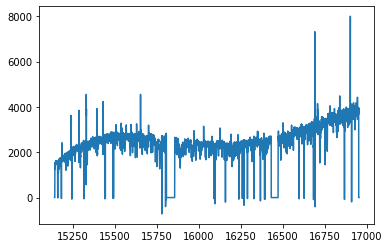

In [12]:
i = 7
plt.plot(tbl['wavelength'][i],tbl['flux'][i])

In [13]:
flux = (np.array(tbl['flux'][i]))
lamb = (np.array(tbl['wavelength'][i]))

print(flux[:7],tbl['flux'][i][:7])
print(lamb[:7],tbl['wavelength'][i][:7]/u.nm)


[   0.        0.        0.        0.        0.        0.     3957.4338] [   0.        0.        0.        0.        0.        0.     3957.4338]
[16954.62361407 16954.41131296 16954.19898885 16953.98664174
 16953.77427164 16953.56187853 16953.34946243] [16954.62361407 16954.41131296 16954.19898885 16953.98664174
 16953.77427164 16953.56187853 16953.34946243] Angstrom / nm


In [14]:
x = np.arange(12)
print(x[3])

3


In [15]:
print(x[x > 5])

[ 6  7  8  9 10 11]


In [16]:
print(x[x])

[ 0  1  2  3  4  5  6  7  8  9 10 11]


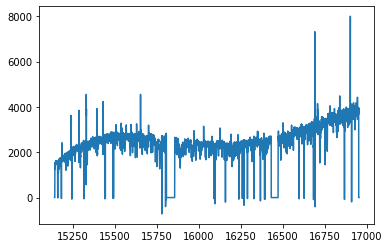

In [17]:
plt.plot(lamb[(lamb > 15000)],flux[(lamb > 15000)])
plt.show()

In [56]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


def butter_highpass(cutoff, fs, order=5):
    nyq           = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a          = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y    = signal.filtfilt(b, a, data)
    return y

In [57]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


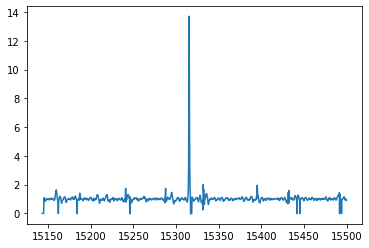

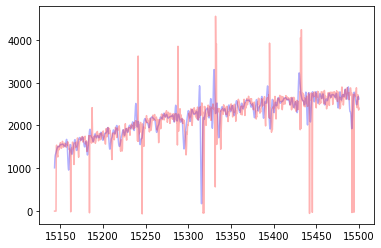

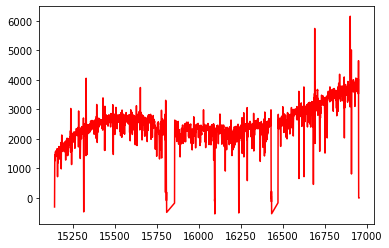

In [65]:
# Filter requirements.
order  = 6
fs     = 100.0       # sample rate, Hz
cutoff = 10 # desired cutoff frequency of the filter, Hz

low__data  = butter_lowpass_filter(flux, cutoff, fs, order)
# high_data = butter_highpass_filter(flux,cutoff,fs)

adjusted_data = flux/low__data

plt.plot(lamb[lamb < 15500],adjusted_data[lamb < 15500])
plt.show()

plt.plot(lamb[(lamb < 15500)],low__data[(lamb < 15500)],color='blue',alpha=0.3)
plt.plot(lamb[(lamb < 15500)],flux[(lamb < 15500)],color='red',alpha=0.3)
plt.show()
plt.plot(lamb[(lamb > 15000)],y[(lamb > 15000)],color='red')
plt.show()

In [39]:
26102 * 90 *.2 * .5


234918.0

In [40]:
print(tbl['BJD'])

     BJD     
-------------
2456653.91632
2456653.92214
2456653.92793
 2456653.9338
2456653.93959
2456653.94542
 2456653.9512
2456653.95708
  2456671.825
2456671.83082
          ...
2456756.61839
2456756.62417
2456756.63005
 2456764.6184
2456764.62423
2456764.63002
2456764.63589
2456764.64168
 2456764.6475
2456764.65329
2456764.65917
Length = 60 rows


In [41]:
import astropy.time as time

In [45]:
t = time.Time(tbl['BJD'],format='mjd')

In [46]:
print(t)

[2456653.91632 2456653.92214 2456653.92793 2456653.9338  2456653.93959
 2456653.94542 2456653.9512  2456653.95708 2456671.825   2456671.83082
 2456671.83661 2456671.84249 2456671.84828 2456671.8541  2456671.85989
 2456671.86576 2456671.87155 2456671.87737 2456671.88316 2456671.88904
 2456701.7345  2456701.74033 2456701.74611 2456701.75199 2456701.75778
 2456701.7636  2456701.76939 2456701.77527 2456729.57169 2456729.57752
 2456729.5833  2456729.58918 2456729.59497 2456729.60079 2456729.60658
 2456729.61245 2456735.57737 2456735.5832  2456735.58899 2456735.59487
 2456735.60065 2456735.60648 2456735.61227 2456735.61814 2456756.58928
 2456756.59511 2456756.6009  2456756.60678 2456756.61256 2456756.61839
 2456756.62417 2456756.63005 2456764.6184  2456764.62423 2456764.63002
 2456764.63589 2456764.64168 2456764.6475  2456764.65329 2456764.65917]


In [50]:
import astropy.time as time
import astropy.coordinates as coordinates
# get_body_barycentric, get_body, get_moon
# solar_system_ephemeris, EarthLocation

t = time.Time(tbl['BJD'],format='mjd')
loc = coordinates.EarthLocation.of_site('apo') 
with coordinates.solar_system_ephemeris.set('builtin'):
    jup = coordinates.get_body('earth-moon-barycenter', t[0], loc) 
jup  

<SkyCoord (GCRS: obstime=2456653.91632, obsgeoloc=(-2390094.81733426, -5149263.66560395, 2899892.5585275) m, obsgeovel=(236.56269386, -229.11878431, -211.86508421) m / s): (ra, dec, distance) in (deg, deg, AU)
    (240.56748593, 1.28477038, 0.00066998)>

In [66]:
print(tbl.colnames)

['wavelength', 'flux', 'flux_err', 'mask', 'BJD']


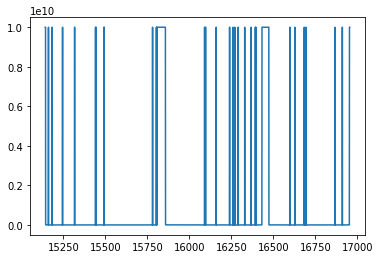

In [70]:
plt.plot(tbl['wavelength'][i],tbl['flux_err'][i])
plt.show()

In [71]:
print(tbl['flux_err'][i])

[1.e+10 1.e+10 1.e+10 ... 1.e+10 1.e+10 1.e+10]


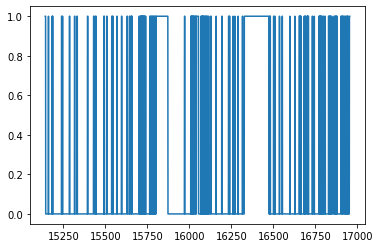

In [72]:
plt.plot(tbl['wavelength'][i],tbl['mask'][i])
plt.show()